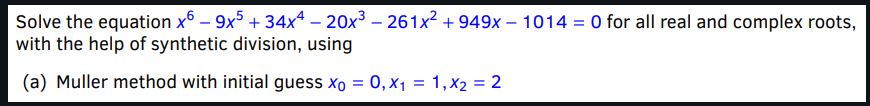

In [17]:
def EvaluatePolynomial(a: list[complex], x: complex,d) -> complex:        
    N = len(a)
    n = N - 1
    p = a[n]
    for i in range(1, N, 1):
        p = a[n - i] + x * p
    return p

In [18]:
def PolyEval(a,x,d):
    N = len(a)
    n = N-1
    v = [0]* (d+1)
    v[0] = a[n]
    for k in range(1, N,1):
        for l in range(d,0,-1):
            v[l] = l*v[l-1]+ x * v[l]
        v[0] = a[n -k] + x * v[0]
    return  v

In [19]:
from EvaluatePolynomial import EvaluatePolynomial
import pandas as pd
pd.options.display.float_format = '{:.10f}'.format

def Laguerre(a,x,e=1.0e-10,maxiter=100):
  n = len(a)-1
  stop = maxiter + 1
  p,dp,ddp = EvaluatePolynomial(a=a,x=x,d=2)
  df = pd.DataFrame(data={'x':[x], 'p(x)':[p]})
  for k in range(1,stop,1):
    if abs(p)<e:
      return (x,df)
    G = dp/p
    H = G**2-ddp/p
    F = ((n-1)*(n*H-G**2))**(1/2)
    if abs(G+F)>abs(G-F):
      dx = n/(G+F)
    else:
      dx = n/(G-F)
    x = x-dx
    p,dp,ddp = EvaluatePolynomial(a=a,x=x,d=2)
    df.lo[k]={'x':x, 'p(x)':p}
    if abs(dx)<e:
      return (x,df)
 
  print('Too many iterations')
  return (x,df)

if __name__ == "__main__":
  x,df = Laguerre(a=[5,0,-4,0,1],x=1000,e=1e-10)
  print(df)


TypeError: EvaluatePolynomial() got an unexpected keyword argument 'd'